# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 17  
TEAM-NAME: no-flux-given
<br>
YOUR-ID: 20171204   
YOUR-NAME: Sagrika Nagar  

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)


## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [3]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
# Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
def exponential_r(a, m, s, x):
    return a*np.exp(-((x-m)**2)/(2*s**2))

def jacobian_gaussian(a, m, s, x, n):
    first = exponential_r(a, m, s, x)/a
    second = (x - m)*exponential_r(a, m, s, x)/np.power(s, 2)
    third = ((x - m)**2)*exponential_r(a, m, s, x)/np.power(s, 3)
    jacobian = np.array([first, second, third])
    return jacobian

def residual(a, m, s, x, y, n):
    res = []
    for x_i, y_i in zip(x, y):
        res.append(exponential_r(a, m, s, x_i) - y_i)
    return np.array(res).reshape(n, -1)
    
def gradient_descent(alpha=0.01, iterations=200, tolerance=1e-15, no_observations=50, k=None, ground_truth=None, noise=None):
    i = 0
    x_observations = np.linspace(-25, 20, num=no_observations)
    a_gt = ground_truth[0]
    m_gt = ground_truth[1]
    s_gt = ground_truth[2]
    y_observations = [exponential_r(a_gt, m_gt, s_gt, x) for x in x_observations]
    
    if noise is not None:
        y_observations += np.random.normal(3, 2.5, size=(no_observations, 1))
    
    residue = []
    while(iterations >= 0):
        a = k[0]
        m = k[1]
        s = k[2]
        residual_value = residual(a, m, s, x_observations, y_observations, no_observations)
        residue.append(np.linalg.norm(residual_value, 2))
        jacobian_residual = jacobian_gaussian(a, m, s, x_observations, no_observations)
        jacobian_function = jacobian_residual@residual_value
        
        delta_k = -(alpha)*jacobian_function
        next_k = k + delta_k
        
        if i != 0 and (np.abs(residue[i] - residue[i-1]) < tolerance):
            break
        else:
            k = next_k
        iterations -= 1
        if i > 0:
            error = np.abs(residue[i]-residue[i-1])
        i += 1

    return residue, k

def gauss_newton(iterations=200, tolerance=1e-15, no_observations=50, k=None, ground_truth=None, noise=None):
    i = 0
    x_observations = np.linspace(-25, 20, num=no_observations)
    a_gt = ground_truth[0]
    m_gt = ground_truth[1]
    s_gt = ground_truth[2]
    y_observations = [exponential_r(a_gt, m_gt, s_gt, x) for x in x_observations]
    
    if noise is not None:
        y_observations += np.random.normal(3, 2.5, size=(no_observations, 1))
    
    residue = []
    while(iterations >= 0):
        a = k[0]
        m = k[1]
        s = k[2]
        residual_value = residual(a, m, s, x_observations, y_observations, no_observations)
        residue.append(np.linalg.norm(residual_value, 2))
        jacobian_residual = jacobian_gaussian(a, m, s, x_observations, no_observations)
        jacobian_function = -1*(jacobian_residual@residual_value)
        jacobian_identity = jacobian_residual@jacobian_residual.T

        delta_k = np.linalg.pinv(jacobian_identity)@ jacobian_function
        next_k = k + delta_k
        
        if i != 0 and (np.abs(residue[i] - residue[i-1]) < tolerance):
            break
        else:
            k = next_k
        iterations -= 1
        if i > 0:
            error = np.abs(residue[i] - residue[i-1])
        i +=1 

    return residue, k

def LM_algorithm(l=0.1, iterations=200, tolerance=1e-15, no_observations=50, k=None, ground_truth=None, noise=None):
    i = 0
    x_observations = np.linspace(-25, 20, num=no_observations)
    a_gt = ground_truth[0]
    m_gt = ground_truth[1]
    s_gt = ground_truth[2]
    y_observations = [exponential_r(a_gt, m_gt, s_gt, x) for x in x_observations]
    
    if noise is not None:
        y_observations += np.random.normal(3, 2.5, size=(no_observations, 1))
    
    identity = np.eye(3)
    residue = []
    while(iterations >= 0):
        a = k[0]
        m = k[1]
        s = k[2]
        residual_value = residual(a, m, s, x_observations, y_observations, no_observations)
        residue.append(np.linalg.norm(residual_value, 2))
        jacobian_residual = jacobian_gaussian(a, m, s, x_observations, no_observations)
        jacobian_function = -1*(jacobian_residual@residual_value)
        jacobian_identity = jacobian_residual@jacobian_residual.T + l*identity

        delta_k = np.linalg.inv(jacobian_identity)@ jacobian_function
        next_k = k + delta_k
        
        if i > 0:
            if residue[i] > residue[i-1]:
                l /= 5
            else:
                l *= 10
        elif i == 0:
            l /= 5
        
        if i != 0 and (np.abs(residue[i]-residue[i-1]) < tolerance):
            break
        else:
            k = next_k
        iterations -= 1
        if i > 0:
            error = np.abs(residue[i] - residue[i-1])
        i +=1 
    return residue, k

def plot_nonlinear(k_initial=None, ground_truth=None, residue=None, k=None, no_observation=50, algorithm=None, noise=None):
    x = np.linspace(-25, 25, no_observation)
    a_gt = ground_truth[0]
    m_gt = ground_truth[1]
    s_gt = ground_truth[2]
    y = exponential_r(a_gt, m_gt, s_gt, x)
    y = np.array(y).reshape(no_observations, 1)
    if noise is not None:
        y += np.random.normal(3, 2.5, size=(no_observations, 1))
    
    
    a_0 = k_initial[0]    
    m_0 = k_initial[1]
    s_0 = k_initial[2]
    z = exponential_r(a_0, m_0, s_0, x)
    
    a = k[0]
    m = k[1]
    s = k[2]
    resultant = exponential_r(a, m, s, x)
    
    plt.figure(figsize= (10, 6))
    plt. subplot(1, 2, 1)
    plt.plot(x, y, label="Ground Truth", linestyle = ":")
    plt.plot(x, z, label="Inital Estimate", linestyle = "--")
    plt.plot(x, resultant, label="Resultant Estimate")
    plt.legend()
    plt.title("Gaussian Distribution for Different Estimates")
    
    plt.subplot(1, 2, 2)
    plt.plot(residue, label="||r||^2")
    plt.legend()
    plt.title("Cost Function vs Iterations")
    plt.suptitle(algorithm)
    plt.show()
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Plots for Question 1
Below the graphs for the 3 algorithms have been plotted. Thr aim of these plots are just to understand how well a given algorithm works and to make sure that convergence occurs. 
- For **Gradient Descent**, the number of iterations are 4000, tolerance is 1e-15, the number of observations are 50 and alpha is 0.01.
- For **Gauss Newton**, the number of iterations are 200, tolerance is 1e-15, and the number of observations are 50
- For **LM Algorithm**, the number of iterations are 200, tolerance is 1e-15, lambda is 0.01, and the number of observations are 50 

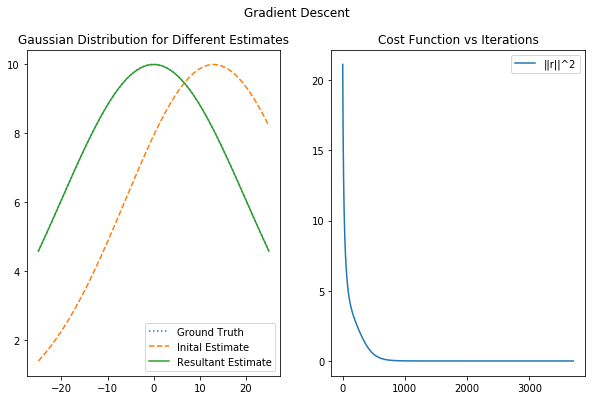

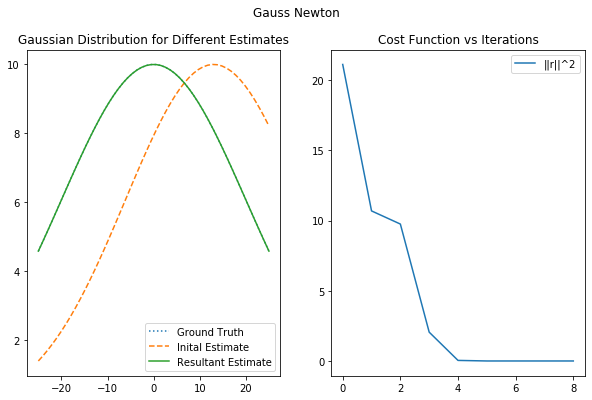

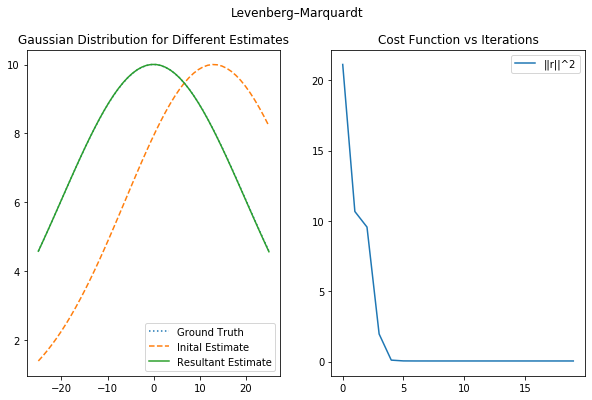

In [3]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
ground_truth = np.array([10, 0, 20]).reshape(3, 1)
k_initial = np.array([10, 13, 19.12]).reshape(3, 1)
tolerance = 1e-15
iterations = 4000
alpha = 0.01
no_observations=50
lamda = 0.01
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
iterations = 200
resg, kg = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, resg, kg, no_observations, algorithm="Gauss Newton")
resl, kl = LM_algorithm(l=lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, resl, kl, no_observations, algorithm="Levenberg–Marquardt")
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Experimentation with values in Question 1
In following set of blocks, we experiment changing different parameters in order to better understand the algorithms.

#### Change in Tolerance 
- The standard values are 4000 iterations, alpha is 0.01 and lambda is 0.01
- Initally, We change the tolerance to a much lower tolerance of **1e-40**. Reducing the tolerance significally does not cause a chnage in the amount of iterations for convergence. 
- When the tolerance is increased to **1e-2**:
    - Gradient Descent converges in 275 iterations, but doesn't come close to the ground truth values
    - Gauss Newton converges in 5 iterations, and seems decently close to the ground truth values
    - LM algorithm converges in 5 iterations, and seems close to the ground truth values

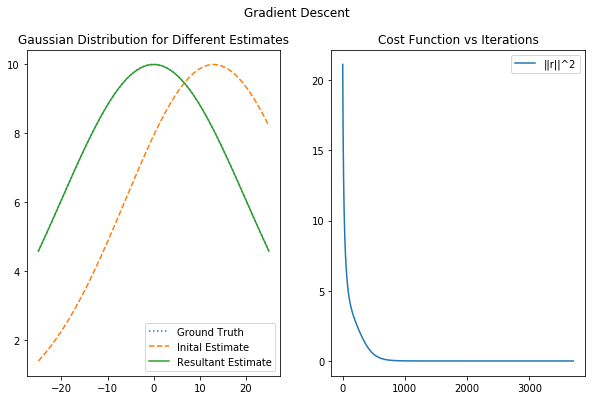

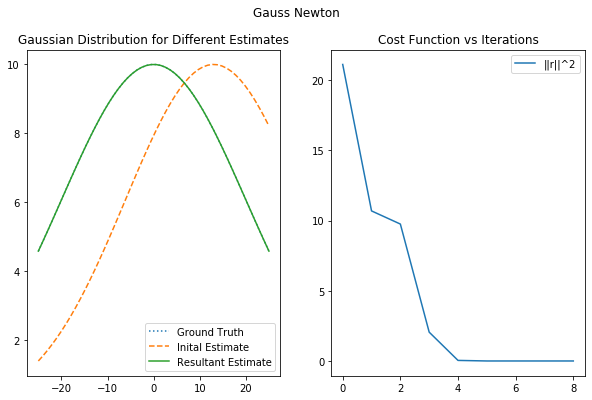

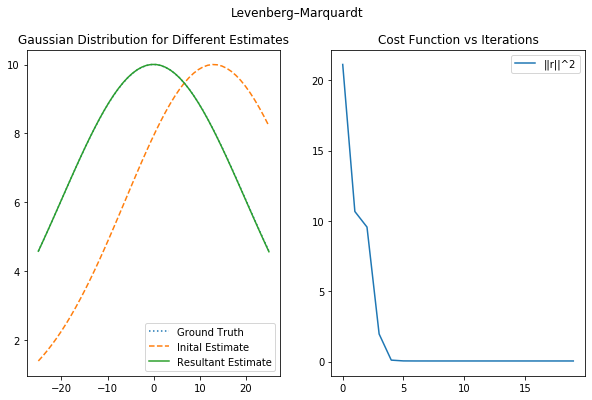

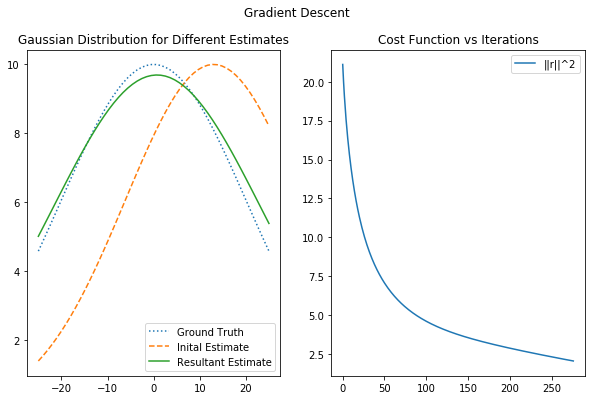

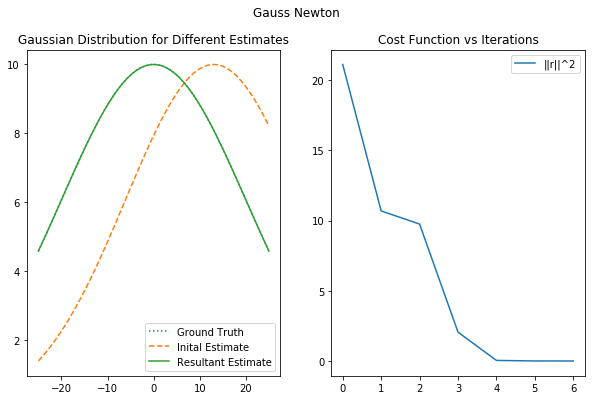

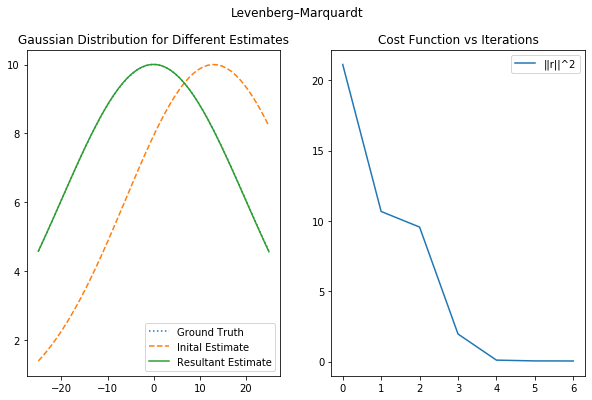

In [4]:
# EXPERIMENTATION WITH HYPER PARAMETERS 1.1 
#Change in tolerance
ground_truth = np.array([10, 0, 20]).reshape(3, 1)
k_initial = np.array([10, 13, 19.12]).reshape(3, 1)
tolerance = 1e-40
iterations = 4000
alpha = 0.01
no_observations=50
lamda = 0.01
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
res, k = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gauss Newton")
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")

tolerance = 1e-2
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
res, k = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gauss Newton")
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")

#### Change in the number of iterations
- The standard values are alpha = 0.01, lambda = 0.01, tolerance = 1e-15, number of observations = 50 
- The initial number of iterations will be **1500**, and it can be observed that there is not much change and the resultant estimate is almost the same as the ground truth estimate in all 3 cases.
- The number of iterations given for Gradient Descent is **200**, and we can see that the resultant estimate is quite away from the ground truth estimate. 
- The number of iterations given for Gauss Newton and LM algorithm is **10**, and we can see that Gauss Newton reaches convergence in 7 iterations, and LM algorithm's estimate is close to the ground truth estimate within 18 iterations

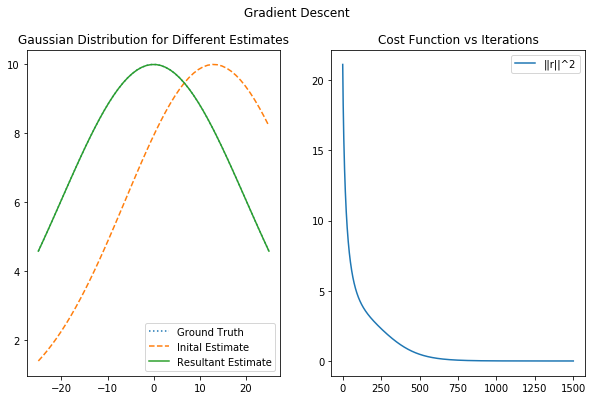

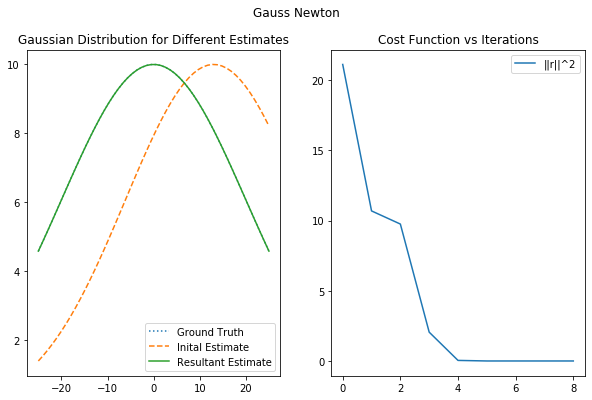

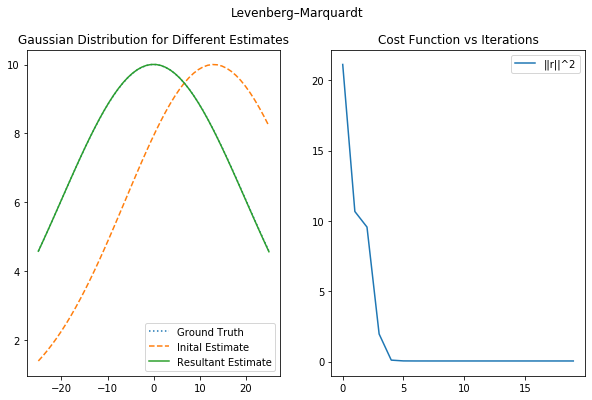

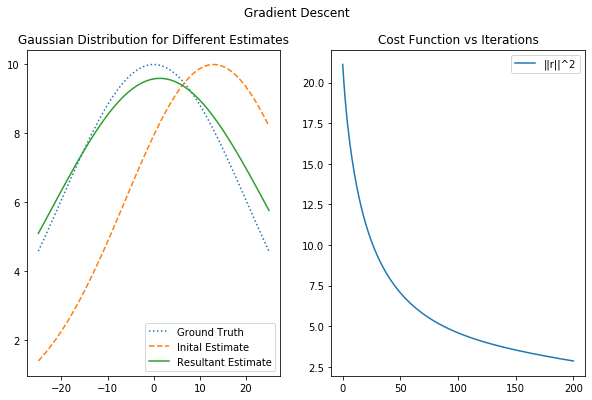

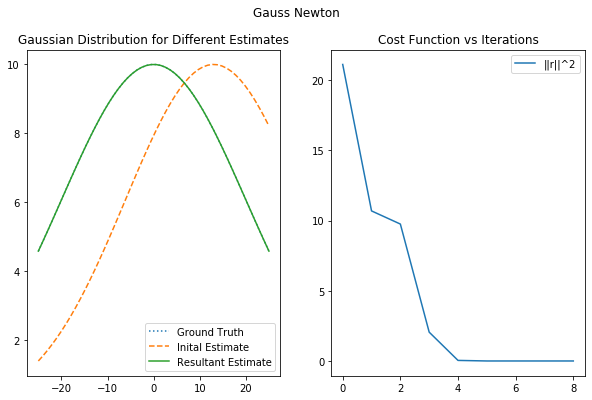

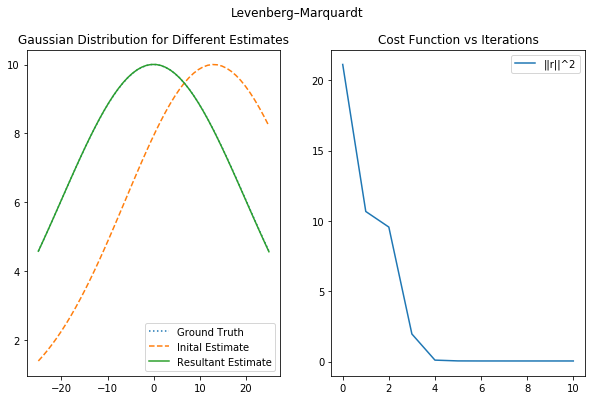

In [5]:
# Change in iterations
# stall at 3705, after which increasing will not factor in so much
ground_truth = np.array([10, 0, 20]).reshape(3, 1)
k_initial = np.array([10, 13, 19.12]).reshape(3, 1)
alpha = 0.01
no_observations=50
lamda = 0.01
tolerance = 1e-15
iterations = 1500
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
res, k = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gauss Newton")
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")

iterations = 200
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
iterations = 10
res, k = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gauss Newton")
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")

#### Change in $\alpha$ in Gradient Descent
- The standard values are, tolerance = 1e-15, iterations = 10000, number of observations = 50
- Initially, we give the alpha value to be **1e-6**, and we can see that even after 10,000 iterations, there is not much change in the resultant estimate from the final estimate (due to the incredibly small value of alpha).
- Then we change the alpha value to be **1.00** and we can see that the resultant estimate is much more different than the ground_truth gaussian. 


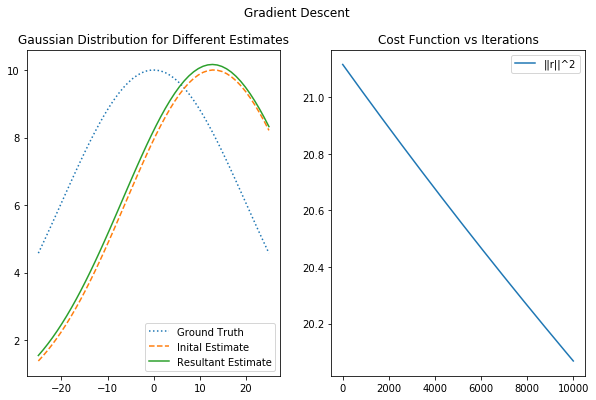

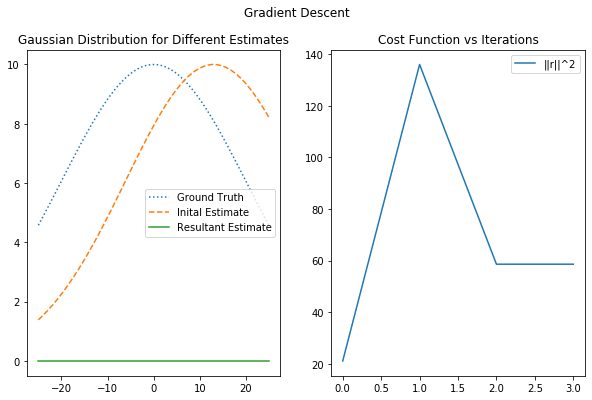

In [6]:
# Change in learning rate 
ground_truth = np.array([10, 0, 20]).reshape(3, 1)
k_initial = np.array([10, 13, 19.12]).reshape(3, 1)
tolerance = 1e-15
iterations = 10000
alpha= 1e-6
no_observations = 50
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
alpha= 1
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")

#### Change in $\lambda$ in LM Algorithm
- The standard values are, tolerance = 1e-15, iterations = 5000, number of observation = 50
- Initially, we give the lambda value to be **1e-10**, we can see that this nearly the Gauss-Newton algorithm, and hence it converges in 7 iterations.
- Then we change the alpha value to be **100** and we can see that there is very less shift from the initial estimate to reach the ground truth gaussian, even though the number of iterations are higher in number

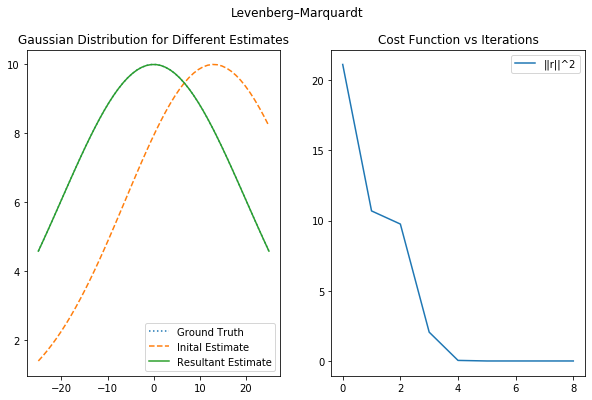

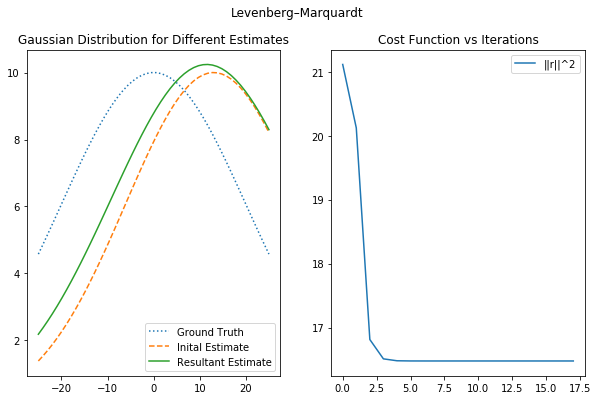

In [7]:
# Change in lambda
# Reducing lambda actually imporves the performance of the algorithm
ground_truth = np.array([10, 0, 20]).reshape(3, 1)
k_initial = np.array([10, 13, 19.12]).reshape(3, 1)
tolerance = 1e-15
iterations = 5000
lamda = 1e-10
no_observations = 50
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")
lamda = 100
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")

#### Change in the number of observations 
- The standard values are alpha = 0.01, lambda = 0.01, tolerance = 1e-15, number of iterations = 5000
- Initially, we take a higher number of observations which is **500**, and we can see that the gradient descent algorithm's final estimate is extremly far from the ground truth estimate, but the Gauss Newton and the LM algorithm result in converge in very small iterations itself. 
- When we set the number of observations to be **2**, we can see that all three algorithms reach convergence at some point. LM algorithm and Gauss Newton reach convergence sooner.

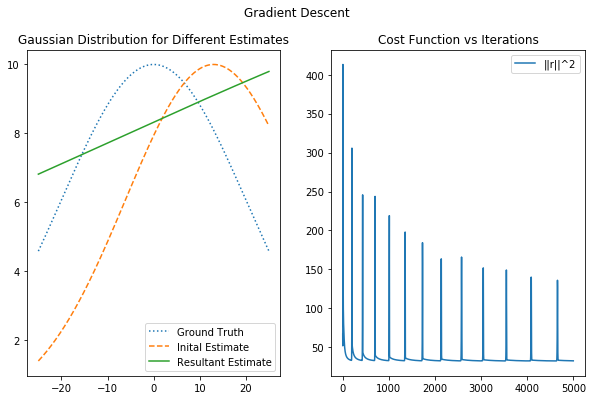

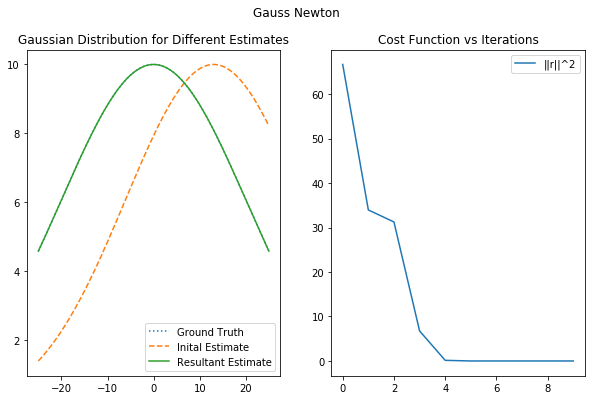

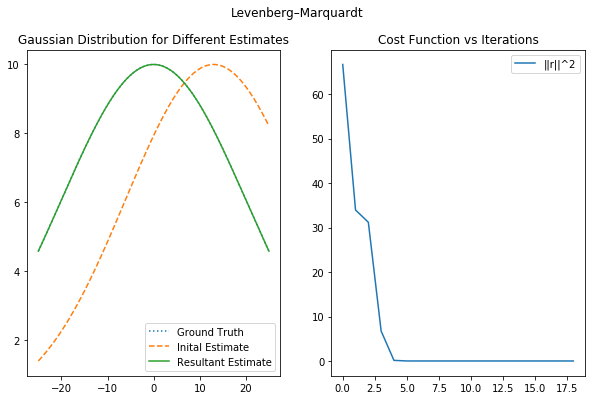

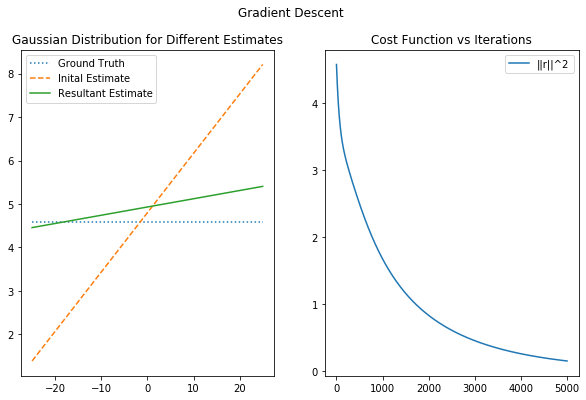

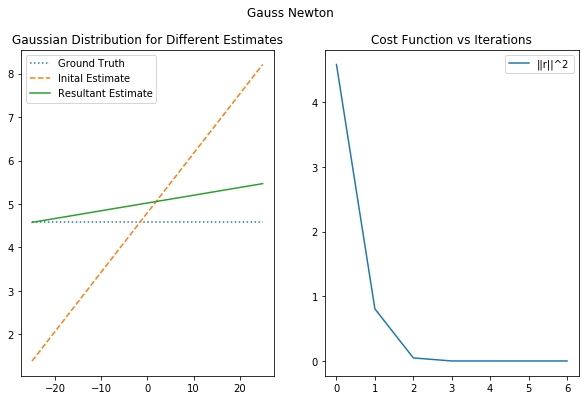

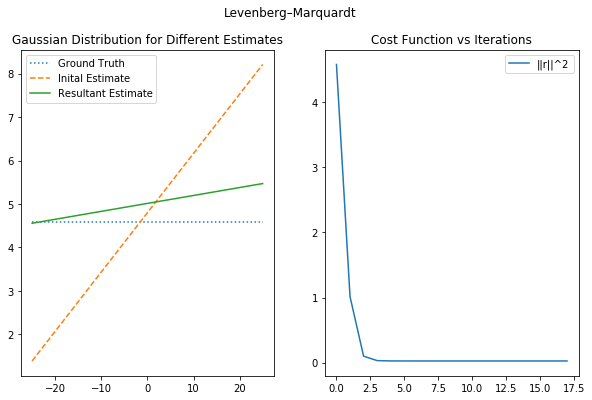

In [8]:
# Change in number of observations
ground_truth = np.array([10, 0, 20]).reshape(3, 1)
k_initial = np.array([10, 13, 19.12]).reshape(3, 1)
alpha = 0.01
lamda = 0.01
tolerance = 1e-15
iterations = 5000
no_observations = 500
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
res, k = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gauss Newton")
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")

no_observations = 2
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
res, k = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gauss Newton")
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")

#### Change in the initial estimate
- The standard values are alpha and lambda = 0.01, tolerance = 1e-15, number of iterations = 10000 and the number of observations = 50
- Here the initial estimate is changed to **[1, 103, 190.12]**, and we can see that eventhough the number of iterations is very high, the final estimate is no where close to the ground truth gaussian.

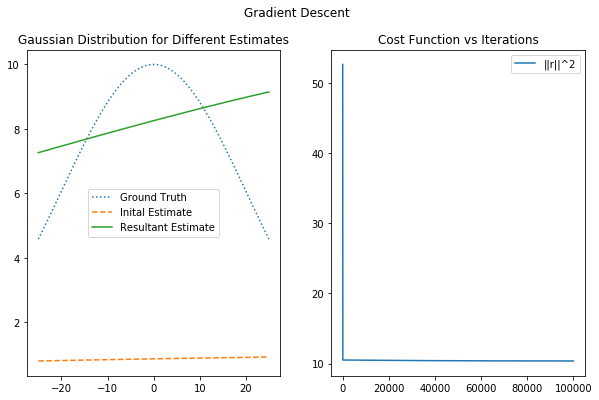

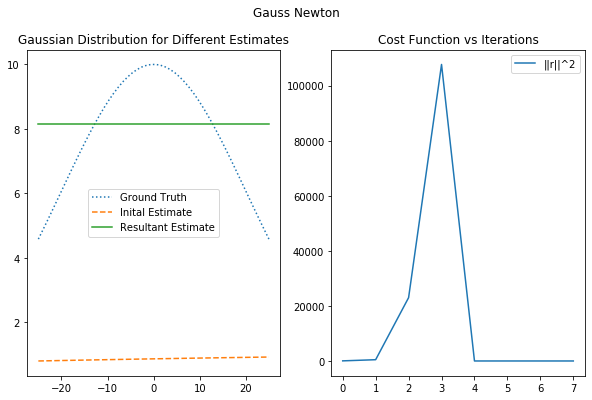

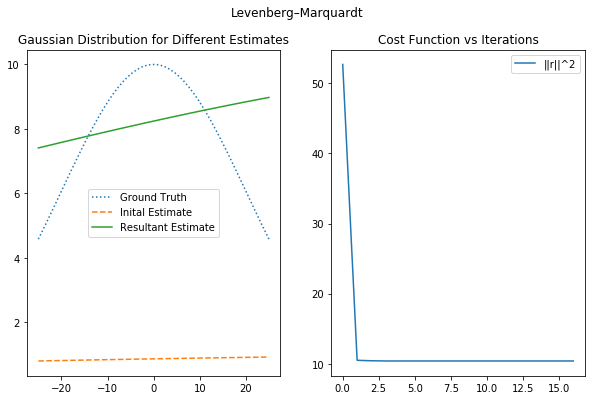

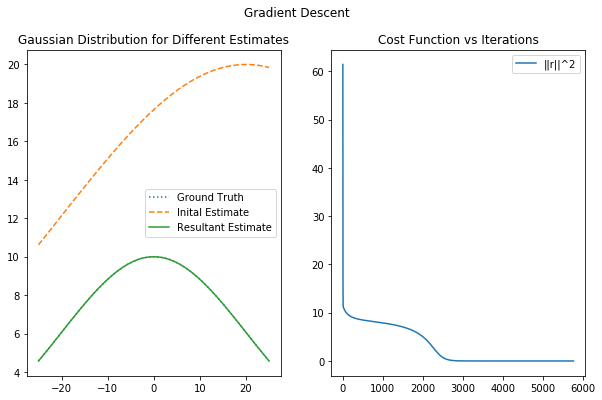

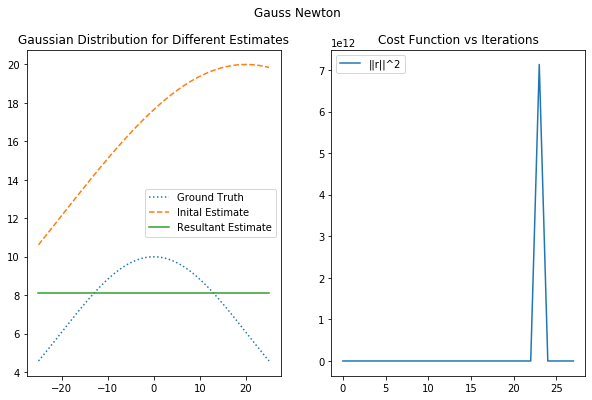

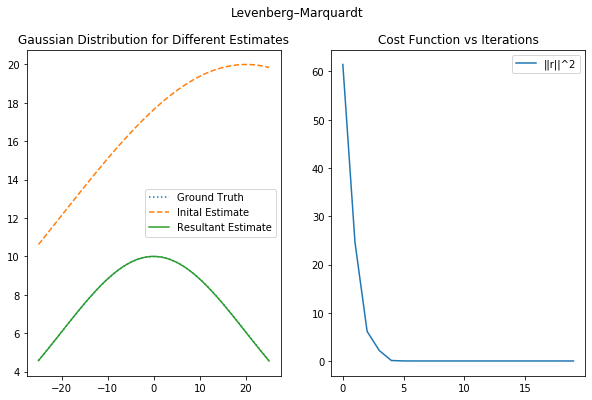

In [9]:
# Change in Initial Estimate
ground_truth = np.array([10, 0, 20]).reshape(3, 1)
alpha = 0.01
no_observations=50
lamda = 0.01
tolerance = 1e-15
iterations = 100000
k_initial = np.array([1, 103, 190.12]).reshape(3, 1)
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
res, k = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gauss Newton")
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")

k_initial = np.array([20, 20, 40]).reshape(3, 1)
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent")
res, k = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gauss Newton")
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt")

#### Adding noise to the observations 
- The standard values are alpha = 0.01 and lambda = 0.01, tolerance = 1e-15, number of iterations = 10000 and the number of observations = 50
- We add some gaussian white noise is added to the observations,and we can see that the values are not very close to the ground truth estimate, even though the convergence condition (i.e, the tolerance condition) is satisfied. 

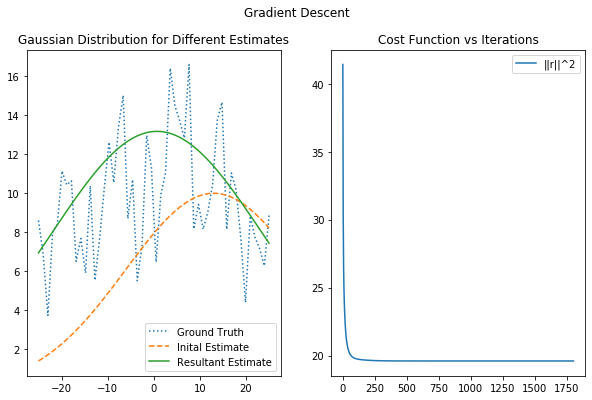

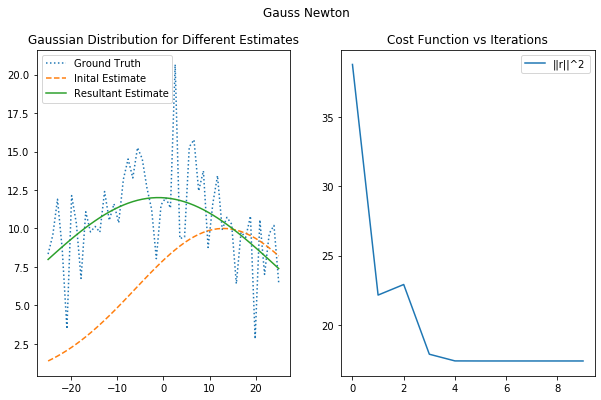

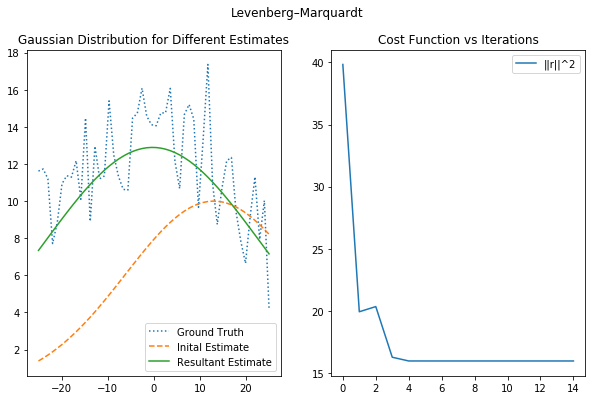

In [10]:
# Adding noise to the inital estimate
ground_truth = np.array([10, 0, 20]).reshape(3, 1)
k_initial = np.array([10, 13, 19.12]).reshape(3, 1)
alpha = 0.01
no_observations=50
lamda = 0.001
tolerance = 1e-15
iterations = 10000
res, k = gradient_descent(alpha=alpha, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth, noise=True)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gradient Descent", noise=True)
res, k = gauss_newton(iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth, noise=True)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Gauss Newton", noise=True)
res, k = LM_algorithm(l = lamda, iterations=iterations, tolerance=tolerance, no_observations=no_observations, k=k_initial, ground_truth=ground_truth, noise=True)
plot_nonlinear(k_initial, ground_truth, res, k, no_observations, algorithm="Levenberg–Marquardt", noise=True)

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
Explain your experimentations with justification here
- Consider the standard values to be ground_truth = [10, 0, 20], k = [10, 13, 19.12], tolerance = 1e-15, iterations = 4000, alpha = 0.01, no_observations = 50
- Below tables show what values have been changed and how the change has affected the estimated values
- For the sake of analysis, we will be looking into the a, m, s, and error values
<br>
<br>
1. Here, we can see that when the tolerance is set to **1e-2** the values are not close to the ground truth values, while for **1e-40** the results are very good. 

| Tolerance   | a             | m       |s       |Error|
| ------------- |:-------------:| -------:|-------:|-------:|
| 1e-40 | 1.00000000e+01| 5.61942032e-14|2.00000000e+01|3.8612978813301286e-15|
| 1e-2    | 9.69354266      | 0.72218921|22.38168811|0.010014675514048221|

2. When we have large number of iterations, the results are better, but for less number of iterations it can be seen that the final estimate is not very close to the ground truth values.

| Number of Iterations   | a             | m       |s       |Error|
| ------------- |:-------------:| -------:|-------:|-------:|
| 1500  | 9.99998854e+00| 1.81872960e-05|2.00000757e+01|6.677616710526306e-07|
| 200   |  9.59665111      | 1.34994906|23.41456638|0.011944582465030606|

3. Altering the alpha values to be too high or too low results in skewed results. Hence, choosing the optimal value for alpha is very important. 

| $\alpha$ - Alpha  | a             | m       |s       |Error|
| ------------- |:-------------:| -------:|-------:|-------:|
| 1e-6    | 10.04257362| 12.91216731|19.21807902|9.687455843732096e-05|
| 1    |    423.78369898   | 17364.49051545|-6163.178373|77.39605418932881|

### Answer for 1.2
Explain your experimentations with justification here
- Consider the standard values to be ground_truth = [10, 0, 20], k = [10, 13, 19.12], tolerance = 1e-15, iterations = 4000, alpha = 0.01, no_observations = 50, lambda = 0.01
<br>
<br>
- **Number of iterations taken by each algorithm**
    - The number of iterations taken for each of the algorithm is as follows. The number of iterations taken by Gauss-Newton is the least, hence Gauss-Newton converges the fastest.

| Algorithm | Number of Iterations| Error |
| ------------- |:-------------:|:---------:|
|   Gradient Descent  | 3705|3.8612978813301286e-15|
| Gauss-Newton   |7  |6.875176798299197e-15|
|LM Algorithm  | 18    | 5.6066262743570405e-15|

- **Change in initial estimate**
     - The change in the initial estimate to **[1, 103, 190.12]** causes a very large difference in all the three algorithms. 

| Change in Initial Estimate  | a             | m       |s       | Error|
| ------------- |:-------------:| -------:|-------:|-------:|
|   Gradient Descent  | 10.74051141| 114.15401444|157.22854878|2.67752486848849e-07|
| Gauss-Newton   |1.50137758e+01   | -1.38175258e+07|-1.24846103e+07|3.552713678800501e-15|
|LM Algorithm  | 10.22942619 |112.63464605|171.26434013|7.105427357601002e-15|

- **Change in initial estimate**
     - When the initial estimate is set to **[20, 20, 40]**, then we can see that the Gauss-Newton algorithms fails to perform well, while Gradient descent and LM algorithm perform very well.

| Change in Initial Estimate  | a             | m       |s       | Error|
| ------------- |:-------------:| -------:|-------:|-------:|
| Gradient Descent| 1.00000000e+01|5.62037868e-14|2.00000000e+01|3.8612978813301286e-15|
| Gauss-Newton   |8.20343346e+00   | 6.10301830e+12|-4.81034659e+13|1.7763568394002505e-15|
|LM Algorithm  | 10.00404342 |-0.03850492|19.96637496|5.35682609381638e-15|

- **Change in number of observations**
    - The number of observations when reduced to only **2** observations, we can see that the performance is not great for any of the algorithms.The algorithms work well till the number of observations is 4. After that, the performance deteriorates. Gauss-Newton and LM Algorithm work well for even 3 observations. 

| Number of Observations  | a             | m       |s       |Error|
| ------------- |:-------------:| -------:|-------:|-------:|
|   Gradient Descent  | 7.04833568| 2.9132796|27.47959001|2.5439719775199876e-14|
| Gauss-Newton   |7.04833568   | 3.30131199|30.46653769|3.765753369354503e-11|
|LM Algorithm  | 7.08898836     | 3.31783934|30.1243913 |5.686423554251974e-15|

- **Change in number of observations**
    - When the number of observations are increased to **500**, we can see that gradient descent's performance detriorirates while the performance of Gauss-Newton and LM Algorithm is intact, with the performance of Gauss Newton being the best. 

| Number of Observations  | a             | m       |s       |Error|
| ------------- |:-------------:| -------:|-------:|-------:|
|Gradient Descent  | 12.89736061| 120.57381016|128.86673149|0.0012270654847554852|
| Gauss-Newton| 1.00000000e+01| -3.52947454e-16|2.00000000e+01|3.641332662533364e-15|
|LM Algorithm| 9.99978893e+00|1.07107216e-04|2.00013843e+01|2.5439719775199876e-14|

- **Adding Noise** 
    - Adding noise to the observations could result in varied results, depending on how the random noise is added. Sometimes the noise added could lead to convergence easiy, but in most situations gauss-newton comes closest to the ground truth values, while the other algorithms don't work so well. For small amount of noise, the results are good, but with large amount noise added, the algorithms do not perform very well. 

| Adding Noise  | a             | m       |s       |Error|
| ------------- |:-------------:| -------:|-------:|-------:|
| Gradient Descent |13.58266473|-0.23733694|20.37715262|1.4210854715202004e 14|
| Gauss-Newton   |12.95225382  | 0.66826734|24.30943715|1.7763568394002505e-15|
|LM Algorithm  | 13.58952628     | 0.09928271|22.87034854|5.329070518200751e-15|




# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [4]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
    plt.cla()
    plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
    plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
    plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
    plt.legend(('X', 'P', 'P0'), loc='lower left')
    plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
    plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
    plt.axis([-10, 15, -10, 15])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()
    plt.pause(2)
    return

# Generating data for our simple ICP
def generate_data():

    # create reference data  
    X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
    # add noise
    P = X + 0.05 * np.random.normal(0, 1, X.shape)

    # translate
    P[0,:] = P[0,:] + 1
    P[1,:] = P[1,:] + 1

    # rotate
    theta1 = ( 10.0 / 360) * 2 * np.pi
    theta2 = (110.0 / 360) * 2 * np.pi
    rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                       [math.sin(theta1),  math.cos(theta1)]])
    rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                       [math.sin(theta2),  math.cos(theta2)]])

    # sets with known correspondences
    P1 = np.dot(rot1, P)
    P2 = np.dot(rot2, P)

    return X, P1, P2

In [7]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code

# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()

# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 2 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        
        # TODO2.1: what's current error?
        mse = np.square(np.subtract(X,P)).mean()
        rmse = np.sqrt(mse) 
        print("Current error: ", rmse)
        
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        
        # TODO2.3: Implement ICP to get R, t
        
        u1 = np.mean(X, axis=1)    
        u2 = np.mean(P, axis=1)
        A_x = X[0,:] - u1[0]
        A_y = X[1,:] - u1[1]
        B_x = P[0,:] - u2[0]
        B_y = P[1,:] - u2[1]
        A = np.array([A_x, A_y])
        B = np.array([B_x, B_y])
        W = A @ B.T  #covariance matrix
            
        U, _, Vt = np.linalg.svd(W)  #SVD
        R = U @ Vt.T     #rotation matrix
        t = u1 - R @ u2    #translation vector
        
        d, n = P.shape
        for j in range(n): #Uncomment this: transforming my current point cloud towards initial point cloud
            P[:,j] = np.dot(R, P[:,j]) + t     
        
       
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

Current error:  1.7151155555292164


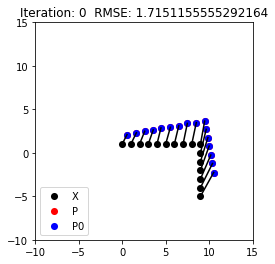

Current error:  0.03398483129844615


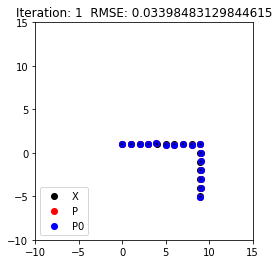

Current error:  9.207779440094637


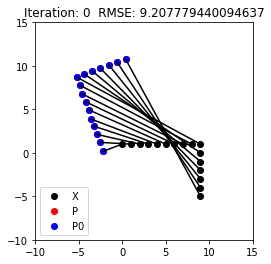

Current error:  0.033984831298446046


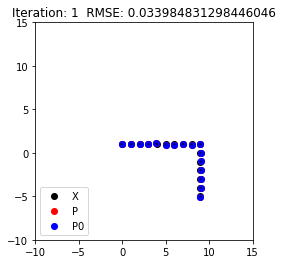

In [8]:
# Call ICP on P1 & P2

ICP(X,P1) #Uncomment this
ICP(X,P2) #Uncomment this